# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



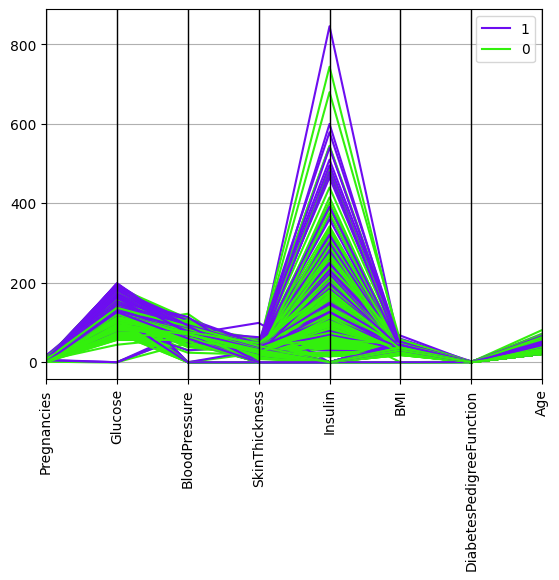

In [4]:
pd.plotting.parallel_coordinates(df,'Outcome',color=('#6d0df0','#33f00d'))
plt.xticks(rotation=90)
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_esc = scaler.transform(X_train)

X_train_esc = pd.DataFrame(X_train_esc, columns=(X_train_esc.columns), index=(X_train_esc.index))

total_data = X_train_esc
total_data['Outcome'] = y_train



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

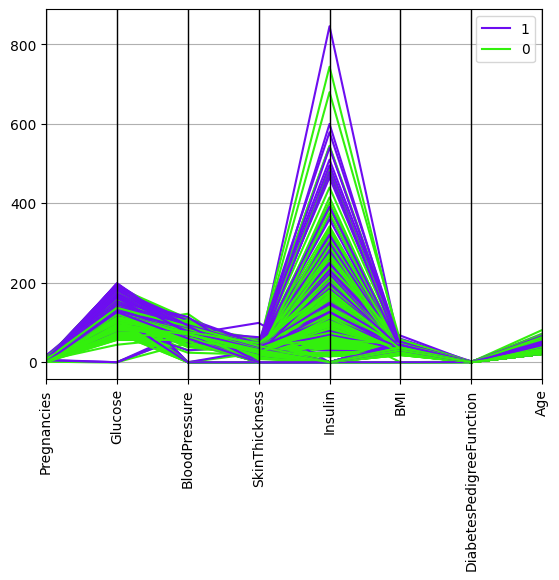

In [21]:
pd.plotting.parallel_coordinates(df,'Outcome',color=('#6d0df0','#33f00d'))
plt.xticks(rotation=90)
plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
from sklearn import tree

fig = plt.figure(figsize=(10,5))
tree.plot_tree(model, features_names=list(X_train.columns), class_names=['0','1'], filled=True)
plt.show()

TypeError: got an unexpected keyword argument 'features_names'

<Figure size 1000x500 with 0 Axes>

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [16]:
from sklearn.metrics import accuracy_score
print(f'Accuracy Score: {accuracy_score(y_pred,y_test)}')

Accuracy Score: 0.7467532467532467


In [36]:
from sklearn.model_selection import GridSearchCV

grid = {
    'max_depth':[5,6,7,8,9,10,11,12],
    'min_samples_split': [3,4,5,6],
    'criterion':['gini','entropy','long_loss']
}

grid_search = GridSearchCV(model,grid,n_jobs=2,scoring='accuracy')



In [37]:
result = grid_search.fit(X_train,y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
93 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.loc

In [38]:
result.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}

In [39]:
best_model = result.best_estimator_

In [40]:
y_pred2 = best_model.predict(X_test)

In [41]:
print(f'Accuracy Score {accuracy_score(y_pred2,y_test)}')

Accuracy Score 0.7922077922077922


In [43]:
from pickle import dump

dump(best_model,open('Desicion_Tree_Classifier_gini_md_5_mss_3_42.sav','wb'))